# Otoczka wypukła

In [9]:
import numpy as np
import pandas as pd
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

### Przykładowe zastosowanie narzędzia do wizualizacji

In [10]:
def draw_example_1():
    vis = Visualizer()

    # point = (x, y)
    points = [
        (-62.781083483620016, 9.295526540248986),
        (-10.543100198806997, -26.080520917553812),
        (-81.64932184252287, -74.42163273030921),
        (-36.297317058417946, -72.91194239793609),
        (37.795092197502356, 57.71110085986143),
        (62.511149567563905, -29.172821102708937),
        (21.82806671019955, 2.647377124715007),
        (-46.24539555503924, 42.65521594922478),
        (-77.92302295134137, -7.666110427206263),
        (25.85862324263843, 62.49564419388622),
        (-27.71649622636616, -67.33453457840331),
        (94.83039177581244, -55.52473300629532),
        (-26.29675918891381, -51.30150933048958),
        (-70.11654929355294, 16.723865705806816),
        (26.682887992598097, -65.55763984116587),
        (57.03377667841906, -55.56635171240132),
        (-16.053624841650247, -42.333295668531456),
        (-56.810858686395505, -37.41219002465095),
        (15.604076302407279, -24.85779870929437),
        (-71.77261869976445, -12.306083264402673),
    ]
    # line_segment = ((x1, y1), (x2, y2))
    line_segments = [
        ((-81.64932184252287, -74.42163273030921), (-36.297317058417946, -72.91194239793609)),
        ((-36.297317058417946, -72.91194239793609), (26.682887992598097, -65.55763984116587)),
        ((26.682887992598097, -65.55763984116587), (94.83039177581244, -55.52473300629532)),
        ((94.83039177581244, -55.52473300629532), (37.795092197502356, 57.71110085986143)),
        ((37.795092197502356, 57.71110085986143), (25.85862324263843, 62.49564419388622)),
        ((25.85862324263843, 62.49564419388622), (-46.24539555503924, 42.65521594922478)),
        ((-46.24539555503924, 42.65521594922478), (-70.11654929355294, 16.723865705806816)),
        ((-70.11654929355294, 16.723865705806816), (-77.92302295134137, -7.666110427206263)),
        ((-77.92302295134137, -7.666110427206263), (-81.64932184252287, -74.42163273030921)),
    ]
    vis.add_point(points, color="green")
    vis.add_line_segment(line_segments, color="blue")
    vis.show()

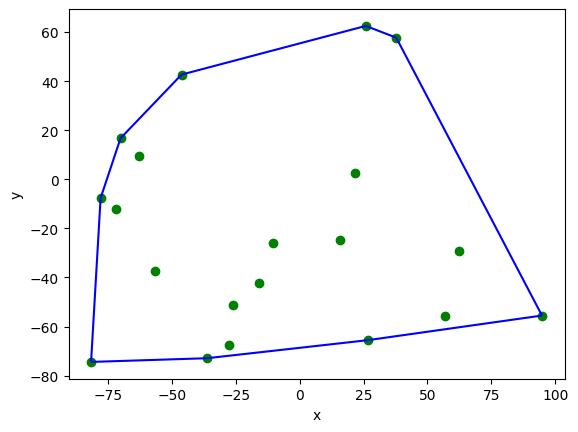

In [11]:
draw_example_1()

### Wprowadzenie

Czym jest otoczka wypukła?  
Podzbiór płaszczyzny $Q$ nazywamy wypukłym iff, gdy dla dowolnej pary punktów $p, q \in Q$ odcinek $\overline{pq}$ jest całkowicie zawarty w $Q$.  
Otoczka wypukła $\mathcal{CH}(Q)$ zbioru $Q$ jest najmniejszym wypukłym zbiorem zawierającym $Q$.

### Zastosowania otoczku wypukłej

Otoczki wypukłe - w szczególności otoczki wypukłe w przestrzeni trójwymiarowej - są spotykane w różnych zastosowaniach. Na przykład używa się ich do przyspieszania wykrywania kolizji w animacji komputerowej. Przepuśćmy, że chcemy sprawdzić, czy dwa obiekty $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się. Jeśli przez większość czasu odpowiedź na to pytanie jest negatywna, to opłaca się następująca strategia. Przybliżamy obiekty przez prostrze obiekty $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$, które zawierały orginały. Jeśli chcemy sprwadzić, czy $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się, najpierw sprawdzamy, czy przecinają się $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$. Jeśli występuje ten przypadek, to powinniśmy wykonać test na orginalnych obiektach, który jest przepuszczalnie znacznie kosztowniejszy.  
Sprawdzanie przecięcia otoczek wypukłych jest bardziej skomplikowane niż dla sfer - choć mimo to łatwiejsze niż dla obiektów niewypukłych - ale otoczki wypukłe mogą dużo lepiej przybliżać większość obiektów.

## Generowanie losowych punktów na płaszczyźnie 

In [12]:
import random

random.seed(1111)

Zapoznaliśmy się i wiemy jak generowac losowe punkty na płaszczyźnie z laboratorium I (współrzędne rzeczywiste typu *double* - podwójna precyzja obliczeń). Przygotuj zestawy punktów, które będzie można użyć jako testowe dla algorytmów obliczania otoczki wypukłej.

Uzupełnij funkcję ```generate_uniform_points```.

In [13]:
def generate_uniform_points(left=-100, right=100, n=100):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """

    return [(random.uniform(left, right), random.uniform(left, right)) for _ in range(n)]

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x \in \langle -100,100 \rangle$ oraz $y \in \langle -100,100\rangle$.

In [14]:
points_a = generate_uniform_points(-100, 100, 100)

Zwizualizuj wygenerowane punkty.

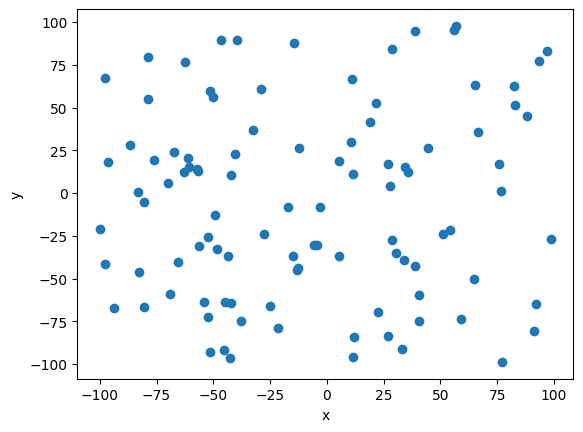

In [15]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

Uzupełnij funkcję ```generate_circle_points```.

In [16]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """

    O_x, O_y = O
    points = []
    for _ in range(n):
        t = random.uniform(0, 1)
        point_x = R * np.cos(2*np.pi*t) + O_x
        point_y = R * np.sin(2*np.pi*t) + O_y
        points.append((point_x, point_y))

    return points

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $O = (0,0)$ i promieniu $R = 10$.

In [17]:
points_b = generate_circle_points((0, 0), 10, 100)

Zwizualizuj wygenerowane punkty.

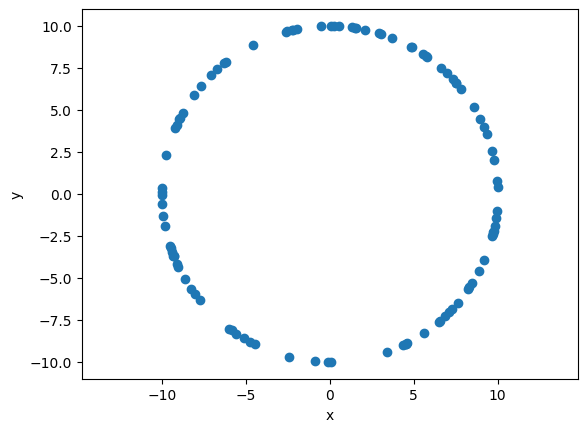

In [18]:
# visualize(points_b)
vis.clear()
vis.axis_equal()
vis.add_point(points_b)
vis.show()

Jak można było zauważyć, to funkcje ```generate_uniform_points``` oraz ```generate_circle_points``` są takie same jak w laboratorium I.

Uzupełnij funkcję ```generate_rectangle_points```.

In [19]:
def generate_colinear_point(a, b):
    '''
    Funkcja generuje jeden punkt leżący na odcinku ab
    :param a: pierwszy punkt na prostej
    :param b: drugi punkt na prostej
    :return: punkt leżący na odcinku ab
    '''
    xa, ya = a
    xb, yb = b

    point = None

    # sprawdzamy czy prosta ma równanie parametryczne
    if xa != xb:
        # wyznaczamy równanie parametryczne y = kx + m
        k = (yb - ya) / (xb - xa)
        m = ya - (k * xa)


        point_x = random.uniform(min(xa, xb), max(xa, xb))
        point_y = k * point_x + m
        new_point = (point_x, point_y)
        point = new_point
    else:
        point_y = random.uniform(min(ya, yb), max(ya, yb))
        point = (xa, point_y)

    return point

In [20]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    points = []

    for _ in range(n):
        option = random.randint(1, 4)
        if option == 1:
            points.append(generate_colinear_point(a, b))
        elif option == 2:
            points.append(generate_colinear_point(b, c))
        elif option == 3:
            points.append(generate_colinear_point(c, d))
        elif option == 4:
            points.append(generate_colinear_point(d, a))

    return points


<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na obwodzie prostokąta, którego wyznaczają wierzchołki
$(-10,-10), (10,-10), (10,10)$ oraz $(-10,10)$.

In [21]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

Zwizualizuj wygenerowane punkty.

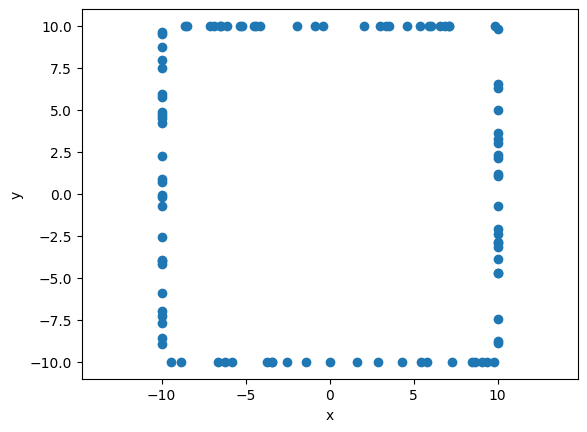

In [22]:
# visualize(points_c)
vis.clear()
vis.axis_equal()
vis.add_point(points_c)
vis.show()

Uzupełnij funkcję ```generate_square_points```.

In [23]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n = 25, diag_n = 20):
    '''
    Funkcja generuje po axis_n punktów na wszystkich bokach kwadratu
    leżących na osiach x i y oraz diag_n punktów na
    przektąnych kwadratu, którego wyznaczają punkty
    a, b, c i d.
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param axis_n: ilość generowanych punktów na każdym
                   boku kwadratu równoległych do osi x i y
    :param diag_n: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    points = [a, b, c, d]

    # wygenerowanie punktów na bokach kwadratu
    for _ in range(axis_n):
        points.append(generate_colinear_point(a, b))

    for _ in range(axis_n):
        points.append(generate_colinear_point(b, c))

    for _ in range(axis_n):
        points.append(generate_colinear_point(c, d))

    for _ in range(axis_n):
        points.append(generate_colinear_point(d, a))

    # wygenerowanie punktów na przekątnych
    for _ in range(diag_n):
        points.append(generate_colinear_point(a, c))

    for _ in range(diag_n):
        points.append(generate_colinear_point(b, d))

    return points

<span style="color:red">Ćw.</span> Wygeneruj losowe punktów w przestrzeni 2D w następujący sposób: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu, zawierający punkty wyznaczające kwadrat $(0, 0), (10, 0), (10, 10)$ oraz $(0, 10)$.

In [24]:
points_d = generate_square_points((0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

Zwizualizuj wygenerowane punkty.

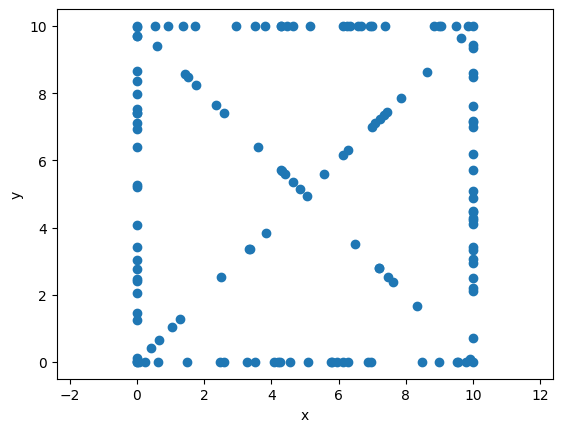

In [25]:
# visualize(points_d)
vis.clear()
vis.axis_equal()
vis.add_point(points_d)
vis.show()

## Algorytm Grahama oraz algorytm Jarvisa

Po przygotowaniu przykładowych zbiorów danych i ich zwizualizowaniu, chcemy zobaczyć jak buduje się dla nich otoczka wypukła z wykorzystaniem różnych algortymów.  
W tych dwóch algorytmach potrzebna będzie funkcja którą już dobrze znamy, czyli funkcja, która sprawdza po której stornie prostej znajduje się punkt.  
Dla każdego algorytmu trzeba będzie zaimplementować dwie funkcje obliczające otoczkę wypukłę, ze względu, że jedna z nich będzie miała możliwość wyświetlania kroków postępowania w algorytmie. Druga funkcja będzie uzyteczna do porównywania czasów dla różnych zbiorów danych i względęm algorytmów.  
W graficznej funkcji danego algorytmu, jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualne rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki, wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).  

### Definicja stałych

In [26]:
VIS_DEFAULT_COLOR = ["blue"]
VIS_CONVEX_HULL_COLOR = ["red"]
VIS_POTENTIALLY_IN_HULL = ["green"]
AFTER_DECIMAL_PRECISION = 12
EPS = 10 ** -AFTER_DECIMAL_PRECISION

### Funkcja do wizualizacji otocznki

In [27]:
def visualise_hull(points, hullPoints):
    vis = Visualizer()
    vis.add_point(points)
    vis.add_point(hullPoints, color = VIS_CONVEX_HULL_COLOR)
    vis.add_line_segment([(hullPoints[i], hullPoints[i+1]) for i in range(len(hullPoints)-1)], color = VIS_CONVEX_HULL_COLOR)
    vis.add_line_segment([hullPoints[-1], hullPoints[0]], color = VIS_CONVEX_HULL_COLOR)
    vis.show()

### Przydatne funkcje ogólne

In [28]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c

    return ax*by + bx*cy + cx*ay - (by*cx + cy*ax + ay*bx)

In [29]:
def orient(a, b, c):
    """
    Wyznaczenie położenia punktu c względem prostej ab
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: 0 - punkt leży na prostej, 1 punkt leży na lewo od prostej, -1 punkt leży na prawo od prostej
    """
    det = mat_det_3x3(a, b, c)
    if abs(det) <= EPS:
        return 0
    elif det > 0:
        return 1
    else:
        return -1

In [30]:
def custom_trunc(number, afterDecimalPrecision):
    """
    Obcięcie precyzji danej liczby do danej liczby miejsc po przecinku
    :param number: liczba
    :param afterDecimalPrecision: liczba miejsc po przecinku, która ma być brana pod uwagę do obliczeń
    :return: wartość liczby o danej precyzji
    """
    return int(number * 10 ** afterDecimalPrecision) * 10 ** -afterDecimalPrecision

In [31]:
def find_point_with_min_y(points):
    """
    Znaleznienie punktu z najmniejszą współrzędną y lub z najmniejszą współrzędną y oraz x
    w przypadku wystąpienia kilku punktów z najmniejszą współrzędną y
    :param points: lista punktów
    :return: punkt z najmniejszą współrzędną y
    """
    minX, minY = points[0]

    for x, y in points:
        if y < minY or (y == minY and x < minX):
            minX, minY = x, y

    return (minX, minY)

In [32]:
def get_vector(beg, end):
    """
    Wyznaczenie wektora o danym początku i końcu
    :param beg: punkt wyznaczający początek wektora
    :param end: punkt wyznaczający koniec wektora
    :return: wyznaczony wektor
    """
    begX, begY = beg
    endX, endY = end
    return (endX - begX, endY - begY)

In [33]:
def dot_product(vec1, vec2):
    """
    Wyznaczenie iloczynu skalarnego dwóch wektorów
    :param vec1: pierwszy wektor
    :param vec2: drugi wektor
    :return: iloczyn skalarny
    """
    dotProduct = 0
    for i in range(len(vec1)):
        dotProduct += vec1[i] * vec2[i]
    return dotProduct

In [34]:
def get_vector_length(vec):
    """
    Wyznaczenie długoci wektora
    :param vec: wektor
    :return: długość wektora
    """
    length = 0
    for i in range(len(vec)):
        length += vec[i] ** 2
    return length ** 0.5

In [35]:
def claculate_cos_of_angle(vec1, vec2):
    """
    Wyznaczenie cosinusa kąta pomiędzy wektorami
    :param vec1: pierwszy wektor
    :param vec2: drugi wektor
    :return: cosinus kąta pomiędzy wektorami
    """
    return dot_product(vec1, vec2) / (get_vector_length(vec1) * get_vector_length(vec2))

### Algorytm Grahama

Algorytm Grahama tworzy otoczkę wypukłą poprzez utrzymywanie stosu $S$, w którym znajdują się punkty, które mogą, ale nie muszą tworzyć otoczki wypukłej. Za każdym razem jest wstawiany na stos (push) jeden punkt z zbioru punktów $Q$ i jest on usuwany ze stosu (pop), jeżeli nie jest punktem $\mathcal{CH}(Q)$. Kiedy algorytm kończy się, stos $S$ zawiera tylko punkty otoczki wypukłej $\mathcal{CH}(Q)$ w kierunku przeciwnym do ruchu wskazówek zegera.

---

Procedura $\mathtt{Graham-Build(Q)}$ przyjmuje zbiór punktów $Q$, gdzie $|Q| \geq 3$. Wywołuje ona funkcję $\mathtt{TOP(S)}$, która zwraca punkt z góry stosu bez zmieniania $S$ oraz
$\mathtt{NEXT-TO-TOP(S)}$, która zwraca punkt ponieżej góry stosu $S$, bez zmieniania stosu. Funkcja $\mathtt{PUSH(p, S)}$ wstawia punkt $p$ na stos $S$. Funkcja $\mathtt{POP(p, S)}$ usuwa punkt $p$ ze stosu $S$.

$\mathtt{Graham-Build(Q)}$  
1)  niech $p_0$ będzie punktem w zbiorze Q z najmniejszą współrzędną $y$,  
    oraz najmniejszą współrzędną $x$ w przypadku, gdy wiele punktów ma tą samą współrzędną $x$  
    
2)  nich $\mathtt{\langle p_1, p_2, \dots, p_m \rangle}$ będzie pozostałym zbiorem punktów w $Q$ posortowanym  
    zgodnie z przeciwnym ruchem wskazówek zegara wokół punktu $p_0$  
    (jeżeli więcej niż jeden punkt ma ten sam kąt to usuwamy wszystkie punkty  
     z wyjątkiem tego najbardziej oddalonego od $p_0$)  
3) stwórz pusty stos $S$  
4) $\mathtt{PUSH(p_0, S)}$
5) $\mathtt{PUSH(p_1, S)}$
6) $\mathtt{PUSH(p_2, S)}$
7) **for** $i = 3$ **to** m  
8) &emsp;**while** kąt utworzony przez $\mathtt{NEXT-TO-TOP(S)}$, $\mathtt{TOP(S)}$ oraz $p_i$ nie tworzy lewostronnego skrętu
9) &emsp;&emsp;$\mathtt{POP(S)}$
10) &emsp;$\mathtt{PUSH(p_i, S)}$
11) **return** $S$


---

Lewostronny skręt oznacza, że dla trzech kolejnych punktów $a, b, c$, punkt $b$ leży po lewej stronie prostej $ac$.  
  

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama.

In [36]:
def add_negative_cos_and_dist_for_each_point(points, pointWithMinY):
    """
    Wyznaczenie wartości cosinusa oraz odległości dla każdego punktu
    :param points: punkty
    :return: lista krotek w postaci (-cosinus kąta, odległość, punkt)
    """
    extendedPoints = []

    for point in points:
        vec = get_vector(pointWithMinY, point)
        vecLen = get_vector_length(vec)
        if vecLen == 0:
            extendedPoints.append((-1, 0, point))
        else:
            dx = point[0] - pointWithMinY[0]
            cos = dx / vecLen
            extendedPoints.append((custom_trunc(-cos, AFTER_DECIMAL_PRECISION), vecLen, point))

    return extendedPoints

In [37]:
def filter_colinear_points(sortedExtendedPoints):
    """
    Odfiltrowanie punktów o tym samym kącie względem punktu o najmniejszej współrzędnej y
    :param sortedExtendedPoints: posortowana po kącie oraz dystansie lista wyznaczona przy
    pomocy funkcji add_negative_cos_and_dist_for_each_point
    :return: lista punktów o unikalnej wartości kąta względem punktu o najmniejszej współrzędnej y
    """
    filteredPoints = [sortedExtendedPoints[0][2]]


    for i in range(2, len(sortedExtendedPoints)):
        prevNegativeCos, _, prevPoint = sortedExtendedPoints[i-1]
        negativeCos, _, _ = sortedExtendedPoints[i]
        if abs(negativeCos - prevNegativeCos) <= EPS:
            continue
        filteredPoints.append(prevPoint)

    _, lastDistance, lastPoint = sortedExtendedPoints[-1]
    if lastDistance != 0:
        filteredPoints.append(lastPoint)

    return filteredPoints

In [38]:
def graham_algorithm(Q: list[tuple: [float, float]]):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    ###########################################
    # znalezienie pierwszego punktu w otoczce #
    ###########################################

    minPoint = find_point_with_min_y(Q)

    #################################
    # posortowanie punktów po kącie #
    #################################

    extendedPoints = add_negative_cos_and_dist_for_each_point(Q, minPoint)
    extendedPoints.sort(key = lambda x: (x[0], x[1]))

    ###########################################
    # odfiltrowanie punktów o tym samym kącie #
    ###########################################

    filteredPoints = filter_colinear_points(extendedPoints)

    #######################
    # znalezienie otoczki #
    #######################

    filteredPointsListLen = len(filteredPoints)

    # umieszczenie pierwszych trzech punktów w otoczce
    stack = filteredPoints[:min(3, filteredPointsListLen)]

    for i in range(3, filteredPointsListLen):
        currPoint = filteredPoints[i]

        while len(stack) >= 2 and orient(stack[-2], stack[-1], currPoint) != 1:
            stack.pop()

        stack.append(currPoint)

    return stack

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [40]:
def graham_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama oraz
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu)
    '''

    vis = Visualizer()
    vis.add_point(Q, color = VIS_DEFAULT_COLOR)

    ###########################################
    # znalezienie pierwszego punktu w otoczce #
    ###########################################

    minPoint = find_point_with_min_y(Q)

    #################################
    # posortowanie punktów po kącie #
    #################################

    extendedPoints = add_negative_cos_and_dist_for_each_point(Q, minPoint)
    extendedPoints.sort(key = lambda x: (x[0], x[1]))

    ###########################################
    # odfiltrowanie punktów o tym samym kącie #
    ###########################################

    filteredPoints = filter_colinear_points(extendedPoints)

    #######################
    # znalezienie otoczki #
    #######################

    filteredPointsListLen = len(filteredPoints)

    # umieszczenie pierwszych trzech punktów w otoczce
    visConvexHullPointsStack = [vis.add_point(minPoint, color = VIS_CONVEX_HULL_COLOR)]
    visConvexHullLinesStack = []
    stack = [minPoint]
    for point in filteredPoints[1:min(3, filteredPointsListLen)]:
        stack.append(point)
        visConvexHullPointsStack.append(vis.add_point(point, color = VIS_POTENTIALLY_IN_HULL))
        visConvexHullLinesStack.append(vis.add_line_segment((stack[-1], stack[-2]), color = VIS_POTENTIALLY_IN_HULL))

    for i in range(3, filteredPointsListLen):
        currPoint = filteredPoints[i]

        while orient(stack[-2], stack[-1], currPoint) != 1:
            stack.pop()
            vis.remove_figure(visConvexHullPointsStack.pop())
            vis.remove_figure(visConvexHullLinesStack.pop())

        stack.append(currPoint)
        visConvexHullPointsStack.append(vis.add_point(currPoint, color = VIS_POTENTIALLY_IN_HULL))
        visConvexHullLinesStack.append(vis.add_line_segment((stack[-1], stack[-2]), color = VIS_POTENTIALLY_IN_HULL))

    vis.add_line_segment((stack[-1], stack[0]), color = VIS_POTENTIALLY_IN_HULL)

    hullLineSegments = [(stack[i], stack[i+1]) for i in range(len(stack)-1)] + [(stack[-1], stack[0])]
    vis.add_point(Q)
    vis.add_line_segment(hullLineSegments, color = VIS_CONVEX_HULL_COLOR)
    vis.add_point(stack, color = VIS_CONVEX_HULL_COLOR)

    return stack, vis

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [41]:
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)

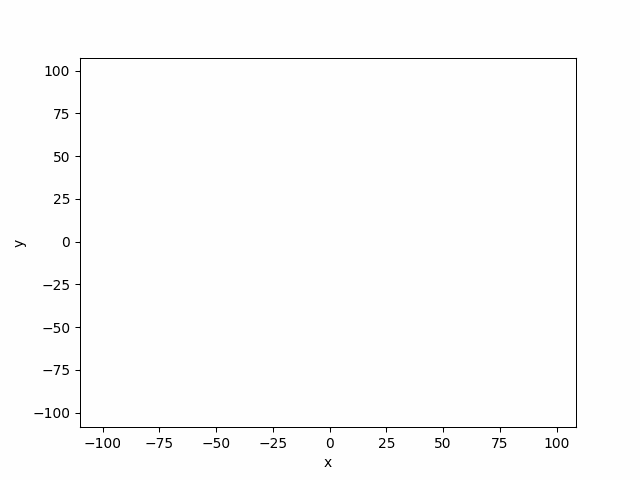

In [126]:
vis_graham_a.show_gif(interval=200)

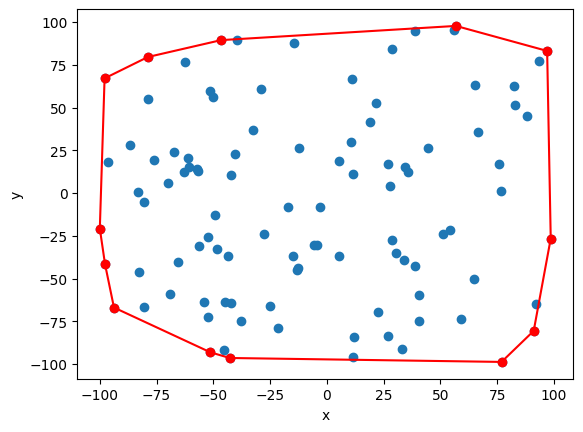

In [42]:
visualise_hull(points_a, graham_points_a)

Zbiór danych B

In [43]:
graham_points_b, vis_graham_b = graham_algorithm_draw(points_b)

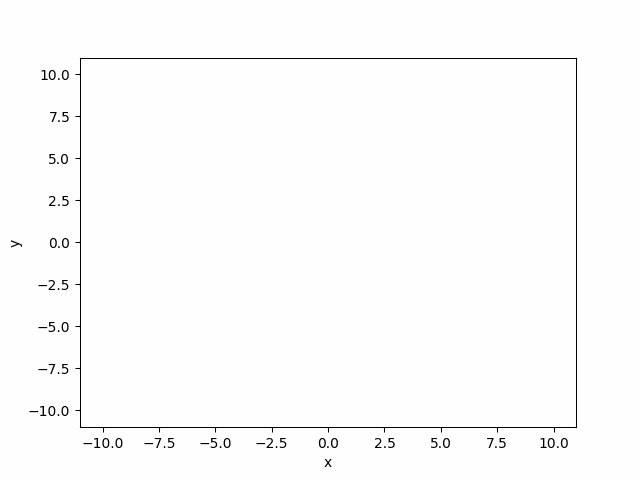

In [175]:
vis_graham_b.show_gif()

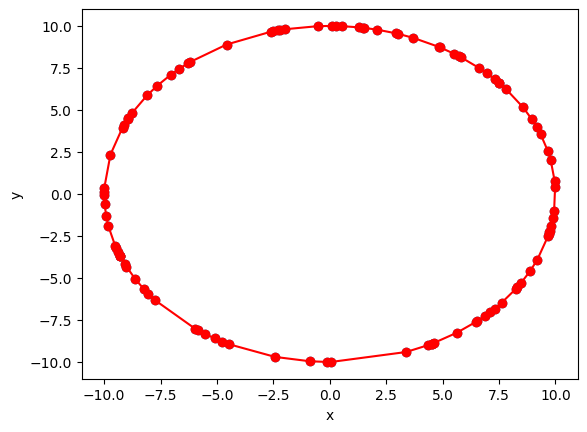

In [44]:
visualise_hull(points_b, graham_points_b)

Zbiór danych C

In [45]:
graham_points_c, vis_graham_c = graham_algorithm_draw(points_c)

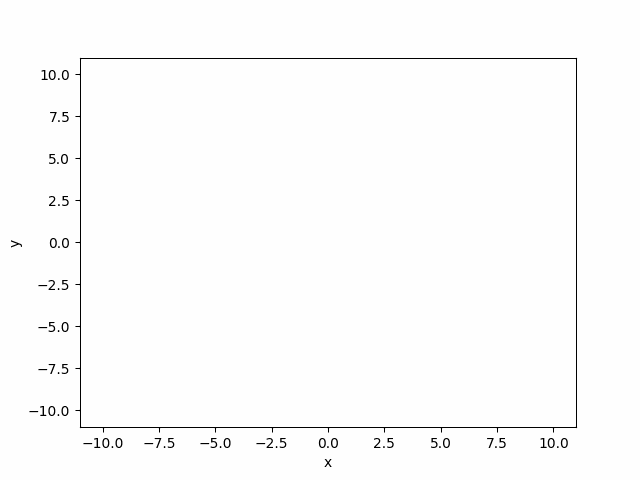

In [178]:
vis_graham_c.show_gif()

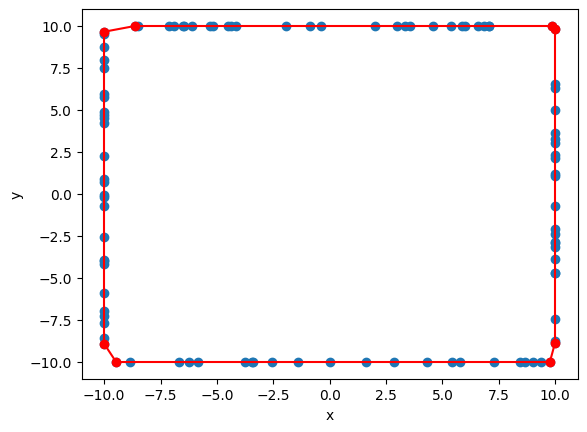

In [46]:
visualise_hull(points_c, graham_points_c)

Zbiór danych D

In [47]:
graham_points_d, vis_graham_d = graham_algorithm_draw(points_d)

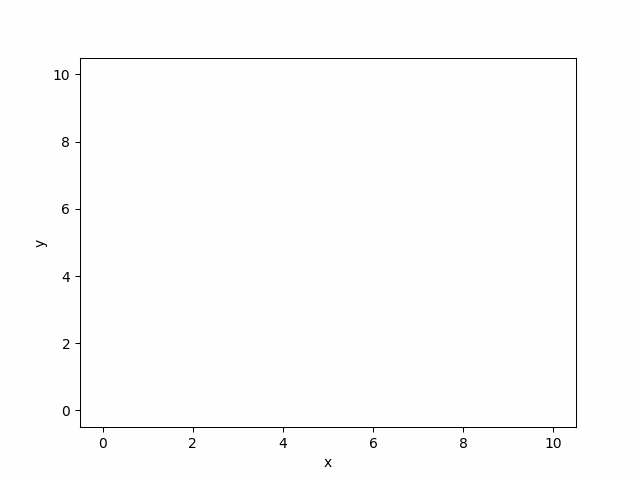

In [181]:
vis_graham_d.show_gif()

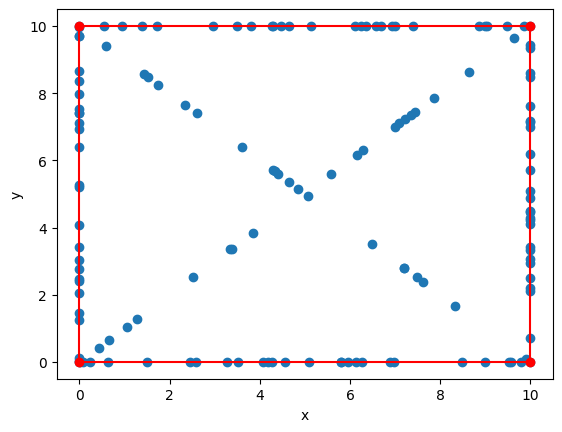

In [48]:
visualise_hull(points_d, graham_points_d)

### Algorytm Jarvisa

Algorytm Jarvisa oblicza otoczkę wypukłą dla zbioru punktów $Q$ przez technikę zwaną owijaniem paczki (*package wrapping*) lub owijaniem prezentu (*gift wrapping*). Algorytm Jarvisa buduje sekwencję $H = \langle p_1, p_2, \dots, p_m \rangle$ będącą wierzchołkami $\mathcal{CH}(Q)$. Zaczynamy od punktu $p_0$, następny punkt $p_1$ w otoczce wypukłej ma najmniejszy kąt w odniesieniu do $p_0$ (w przypadku takiego samego kąta - wybiera się punkt najdalej od $p_0$). Podobnie, gdy $p_2$ ma najmniejszy kąt w odniesieniu do $p_1$, itd.. Zauważyć warto, że możemy tym sposobem obliczyć lewy i prawy łańcuch otoczki wypukłej $\mathcal{CH}(Q)$. Lewy łańcuch buduje się podobnie. Gdy osiągniemy najwyższy wierzchołej w prawym łańcuchu $p_k$, wybieramy wierzchołek $p_{k+1}$, który ma najmniejszy kąt w odniesieniu do $p_k$, ale od ujemnej osi-$x$. Można zaimplementować algorytm Jarvisa bez konstruowania pomocniczych łańcuchów - lewego i prawego. Taka implementacja utrzymuje śledzenie kąta ostatniej strony otoczki wypukłej i wymaga sekwencji kątów boków otoczki tylko rosnącej. (Patrząc na trzy ostatnie punkty jesteśmy w stanie obliczyć jaki punkt należy włączyć do $\mathcal{CH}(Q)$ w zależności od budowanego punktu)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa.

In [49]:
def jarvis_algorithm(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    ###########################################
    # znalezienie pierwszego punktu w otoczce #
    ###########################################

    minPoint = find_point_with_min_y(Q)
    hull = [minPoint]

    maxCos = -1             # największa wartość cosinusa daje najmniejszą wartość kąta
    maxLenght = 0
    nextPointInHull = None
    xVersor = (1, 0)

    #########################################
    # znalezienie drugiego punktu w otoczce #
    #########################################

    for point in Q:
        if point == minPoint:
            continue
        currentPointVector = get_vector(minPoint, point)
        currentVectorLength = get_vector_length(currentPointVector)
        currentPointCos = custom_trunc(claculate_cos_of_angle(xVersor, currentPointVector), AFTER_DECIMAL_PRECISION)
        if maxCos < currentPointCos or (maxCos == currentPointCos and maxLenght < currentVectorLength):
            nextPointInHull = point
            maxCos = currentPointCos
            maxLenght = currentVectorLength

    if nextPointInHull is None:
        return hull

    hull.append(nextPointInHull)

    #############################################
    # znalezienie pozostałych punktów w otoczce #
    #############################################

    while True:
        nextPointInHull = None
        maxLenght = 0
        maxCos = -1

        oneBeforeLastInHull = hull[-2]
        lastInHull = hull[-1]

        for point in Q:
            if point == lastInHull:
                continue

            hullVector = get_vector(oneBeforeLastInHull, lastInHull)

            currentPointVector = get_vector(lastInHull, point)
            currentVectorLength = get_vector_length(currentPointVector)

            currentPointCos = custom_trunc(claculate_cos_of_angle(hullVector, currentPointVector), AFTER_DECIMAL_PRECISION)

            if maxCos < currentPointCos or (maxCos == currentPointCos and maxLenght < currentVectorLength):
                nextPointInHull = point
                maxCos = currentPointCos
                maxLenght = currentVectorLength

        # sprawdzenie czy znaleziono wszystkie punkty w otoczce
        if nextPointInHull == minPoint:
            break
        else:
            hull.append(nextPointInHull)

    return hull

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa z dodatkową opcją wyświetlania kroków algorytmu.

In [50]:
def jarvis_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu)
    '''

    vis = Visualizer()
    vis.add_point(Q, color = VIS_DEFAULT_COLOR)

    ###########################################
    # znalezienie pierwszego punktu w otoczce #
    ###########################################

    minPoint = find_point_with_min_y(Q)
    hull = [minPoint]

    vis.add_point(minPoint, color = VIS_CONVEX_HULL_COLOR)

    maxCos = -1             # największa wartość cosinusa daje najmniejszą wartość kąta
    maxLenght = 0
    nextPointInHull = None
    xVersor = (1, 0)

    visNextPointInHull = None
    visNextHullLineSegment = None

    #########################################
    # znalezienie drugiego punktu w otoczce #
    #########################################

    for point in Q:
        if point == minPoint:
            continue
        currentPointVector = get_vector(minPoint, point)
        currentVectorLength = get_vector_length(currentPointVector)
        currentPointCos = custom_trunc(claculate_cos_of_angle(xVersor, currentPointVector), AFTER_DECIMAL_PRECISION)
        if maxCos < currentPointCos or (maxCos == currentPointCos and maxLenght < currentVectorLength):
            if visNextPointInHull is not None:
                vis.remove_figure(visNextHullLineSegment)
                vis.remove_figure(visNextPointInHull)
            nextPointInHull = point
            maxCos = currentPointCos
            maxLenght = currentVectorLength
            visNextPointInHull = vis.add_point(nextPointInHull, color = VIS_POTENTIALLY_IN_HULL)
            visNextHullLineSegment = vis.add_line_segment((hull[-1], nextPointInHull), color = VIS_POTENTIALLY_IN_HULL)

    if nextPointInHull is None:
        return hull

    hull.append(nextPointInHull)

    vis.add_point(nextPointInHull, color = VIS_CONVEX_HULL_COLOR)
    vis.add_line_segment((minPoint, nextPointInHull), color = VIS_CONVEX_HULL_COLOR)

    #############################################
    # znalezienie pozostałych punktów w otoczce #
    #############################################

    while True:
        nextPointInHull = None
        maxLenght = 0
        maxCos = -1

        oneBeforeLastInHull = hull[-2]
        lastInHull = hull[-1]

        for point in Q:
            if point == lastInHull:
                continue

            hullVector = get_vector(oneBeforeLastInHull, lastInHull)

            currentPointVector = get_vector(lastInHull, point)
            currentVectorLength = get_vector_length(currentPointVector)

            currentPointCos = custom_trunc(claculate_cos_of_angle(hullVector, currentPointVector), AFTER_DECIMAL_PRECISION)

            if maxCos < currentPointCos or (maxCos == currentPointCos and maxLenght < currentVectorLength):
                if visNextPointInHull is not None:
                    vis.remove_figure(visNextHullLineSegment)
                    vis.remove_figure(visNextPointInHull)
                nextPointInHull = point
                maxCos = currentPointCos
                maxLenght = currentVectorLength
                visNextPointInHull = vis.add_point(nextPointInHull, color = VIS_POTENTIALLY_IN_HULL)
                visNextHullLineSegment = vis.add_line_segment((hull[-1], nextPointInHull), color = VIS_POTENTIALLY_IN_HULL)

        # sprawdzenie czy znaleziono wszystkie punkty w otoczce
        if nextPointInHull == minPoint:
            break
        else:
            vis.add_point(nextPointInHull, color = VIS_CONVEX_HULL_COLOR)
            vis.add_line_segment((hull[-1], nextPointInHull), color = VIS_CONVEX_HULL_COLOR)
            hull.append(nextPointInHull)

    vis.add_line_segment((hull[-1], minPoint), color = VIS_CONVEX_HULL_COLOR)

    return hull, vis

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [51]:
jarvis_points_a, vis_jarvis_a = jarvis_algorithm_draw(points_a)

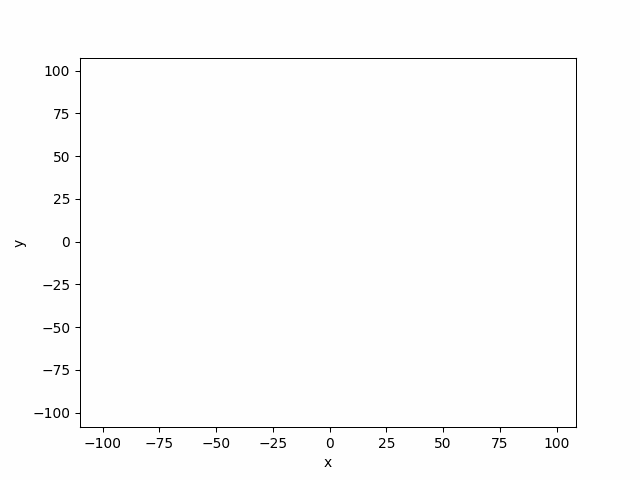

In [187]:
vis_jarvis_a.show_gif()

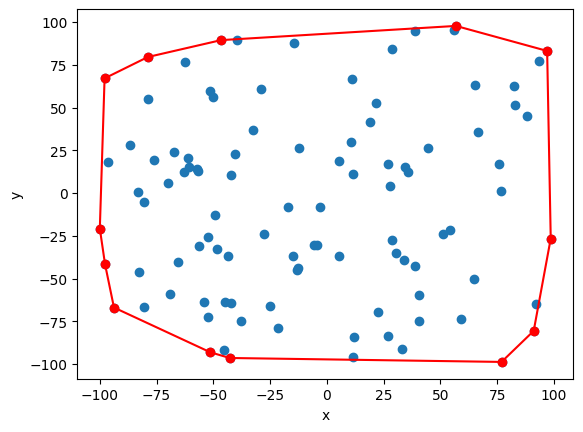

In [52]:
visualise_hull(points_a, jarvis_points_a)

Zbiór danych B

In [53]:
jarvis_points_b, vis_jarvis_b = jarvis_algorithm_draw(points_b)

In [190]:
vis_jarvis_b.show_gif()

: 

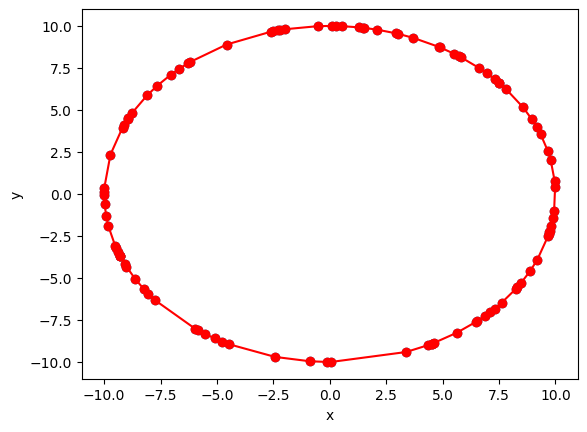

In [54]:
visualise_hull(points_b, jarvis_points_b)

Zbiór danych C

In [55]:
jarvis_points_c, vis_jarvis_c = jarvis_algorithm_draw(points_c)

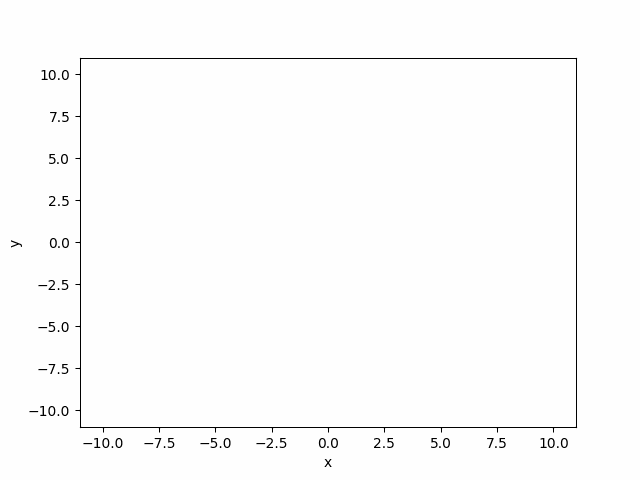

In [56]:
vis_jarvis_c.show_gif()

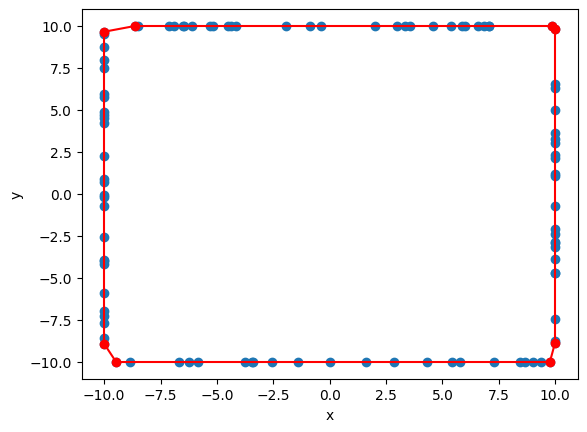

In [55]:
visualise_hull(points_c, jarvis_points_c)

Zbiór danych D

In [57]:
jarvis_points_d, vis_jarvis_d = jarvis_algorithm_draw(points_d)

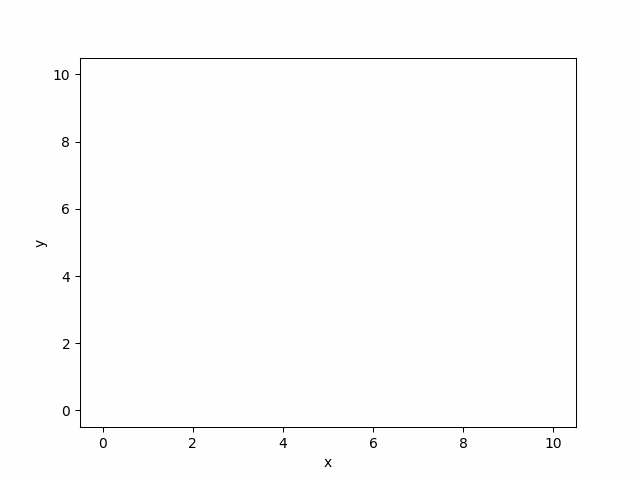

In [59]:
vis_jarvis_d.show_gif()

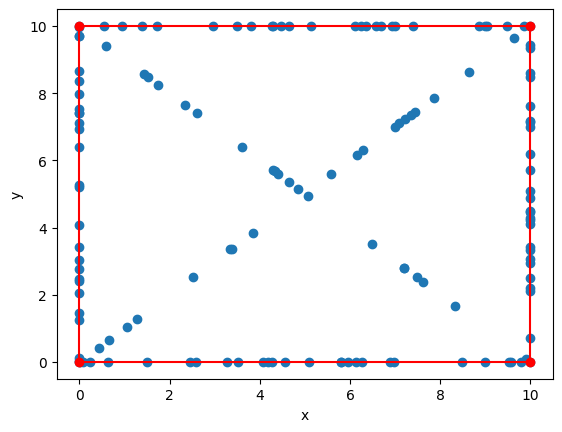

In [60]:
visualise_hull(points_d, jarvis_points_d)

## Porównanie wydajności algorytmów Grahama i Jarvisa


---

Po zobaczeniu i przetestowaniu wstępnie zbiorów danych, przyszła kolej na porównanie czasów działania dla różnych danych. Do tego potrzebujemy bardziej miarodajnych zbiorów danych.  
<span style="color:red">Ćw.</span> Stwórz zmodyfikowane zbiory danych A, B, C oraz D - tak jak uważasz za słuszne.

In [61]:
# prepare your data to time-test
pointsInSetA = [100, 500, 1_000, 5000, 10_000, 50_000, 100_000]
list_of_modified_points_a = [generate_uniform_points(-1000, 1000, pointsNo) for pointsNo in pointsInSetA]

pointsInSetB = [100, 500, 1_000, 5_000]
list_of_modified_points_b = [generate_circle_points((0, 0), 1000, pointsNo) for pointsNo in pointsInSetB]

pointsInSetC = [100, 500, 1_000, 5000, 10_000, 50_000, 100_000]
list_of_modified_points_c = [generate_rectangle_points((-1000, -1000), (500, -1000), (500, 500), (-1000, 500), pointsNo) for pointsNo in pointsInSetC]

pointsInSetD = [100, 500, 1_000, 5000, 10_000, 50_000, 100_000]
list_of_modified_points_d = [generate_square_points((-10, -10), (10, -10), (10, 10), (-10, 10), pointsNo // 8, pointsNo // 4) for pointsNo in pointsInSetD]

Po przygotowaniu zbioru danych, dokonaj porównania czasowego  
<span style="color:red">Ćw.</span> Porównaj zmodyfikowane zbiory danych A, B, C oraz D dla algorytmów Grahama i Jarvisa.

In [62]:
import time
from tabulate import tabulate

In [63]:
def test_function(function, listOfPointsList):
    timeResult = []
    for points in listOfPointsList:
        start = time.time()
        function(points)
        end = time.time()
        executionTime = round(end - start, 4)
        timeResult.append(executionTime)
    return timeResult

In [64]:
def compare_functions_output(listOfPointsList):
    numberOfPointsInHullGraham = ["no points in hull (graham_algorithm)"]
    numberOfPointsInHullJarvis = ["no points in hull (jarvis_algorithm)"]
    sameResult = ["same points in hull"]
    for points in listOfPointsList:
        outputGraham = graham_algorithm(points)
        outputJarvis = jarvis_algorithm(points)
        numberOfPointsInHullGraham.append(len(outputGraham))
        numberOfPointsInHullJarvis.append(len(outputJarvis))
        sameResult.append(outputGraham == outputJarvis)

    return [numberOfPointsInHullGraham, numberOfPointsInHullJarvis, sameResult]

### Porównanie dla zmodyfikowanego zbioru A

In [136]:
# compare set A
table_data = []
table_data.append(["graham_algorithm exec time"] + test_function(graham_algorithm, list_of_modified_points_a))
table_data.append(["jarvis_algorithm exec time"] + test_function(jarvis_algorithm, list_of_modified_points_a))
print(tabulate(table_data, pointsInSetA, tablefmt="grid"))

+----------------------------+--------+--------+--------+--------+---------+---------+----------+
|                            |    100 |    500 |   1000 |   5000 |   10000 |   50000 |   100000 |
+============================+========+========+========+========+=========+=========+==========+
| graham_algorithm exec time | 0.0004 | 0.0022 | 0.0042 | 0.0515 |  0.0678 |  0.3692 |   0.5027 |
+----------------------------+--------+--------+--------+--------+---------+---------+----------+
| jarvis_algorithm exec time | 0.0034 | 0.0195 | 0.0578 | 0.3657 |  0.6598 |  4.2996 |   8.6674 |
+----------------------------+--------+--------+--------+--------+---------+---------+----------+


In [134]:
# compare set A
table_data = compare_functions_output(list_of_modified_points_a)
print(tabulate(table_data, pointsInSetA, tablefmt="grid"))

+-----------------------------------+-------+-------+--------+--------+---------+---------+----------+
|                                   |   100 |   500 |   1000 |   5000 |   10000 |   50000 |   100000 |
+===================================+=======+=======+========+========+=========+=========+==========+
| points in hull (graham_algorithm) |    14 |    17 |     23 |     23 |      24 |      26 |       28 |
+-----------------------------------+-------+-------+--------+--------+---------+---------+----------+
| points in hull (jarvis_algorithm) |    14 |    17 |     23 |     23 |      24 |      26 |       28 |
+-----------------------------------+-------+-------+--------+--------+---------+---------+----------+
| same points in hull               |  True |  True |   True |   True |    True |    True |     True |
+-----------------------------------+-------+-------+--------+--------+---------+---------+----------+


### Porównanie dla zmodyfikowanego zbioru B

In [66]:
# compare set B
table_data = []
table_data.append(["graham_algorithm exec time"] + test_function(graham_algorithm, list_of_modified_points_b))
table_data.append(["jarvis_algorithm exec time"] + test_function(jarvis_algorithm, list_of_modified_points_b))
print(tabulate(table_data, pointsInSetB, tablefmt="grid"))

+----------------------------+--------+--------+--------+----------+
|                            |    100 |    500 |   1000 |     5000 |
+============================+========+========+========+==========+
| graham_algorithm exec time | 0.0003 | 0.0095 | 0.0059 |   0.0594 |
+----------------------------+--------+--------+--------+----------+
| jarvis_algorithm exec time | 0.0534 | 1.0121 | 5.9078 | 105.276  |
+----------------------------+--------+--------+--------+----------+


In [65]:
# compare set B
table_data = compare_functions_output(list_of_modified_points_b)
print(tabulate(table_data, pointsInSetB, tablefmt="grid"))

+--------------------------------------+-------+-------+--------+--------+
|                                      |   100 |   500 |   1000 |   5000 |
+======================================+=======+=======+========+========+
| no points in hull (graham_algorithm) |   100 |   500 |   1000 |   5000 |
+--------------------------------------+-------+-------+--------+--------+
| no points in hull (jarvis_algorithm) |   100 |   500 |   1000 |   5000 |
+--------------------------------------+-------+-------+--------+--------+
| same points in hull                  |  True |  True |   True |   True |
+--------------------------------------+-------+-------+--------+--------+


### Porównanie dla zmodyfikowanego zbioru C

In [67]:
# compare set C
table_data = []
table_data.append(["graham_algorithm exec time"] + test_function(graham_algorithm, list_of_modified_points_c))
table_data.append(["jarvis_algorithm exec time"] + test_function(jarvis_algorithm, list_of_modified_points_c))
print(tabulate(table_data, pointsInSetC, tablefmt="grid"))

+----------------------------+--------+--------+--------+--------+---------+---------+----------+
|                            |    100 |    500 |   1000 |   5000 |   10000 |   50000 |   100000 |
+============================+========+========+========+========+=========+=========+==========+
| graham_algorithm exec time | 0.0004 | 0.0056 | 0.0093 | 0.0516 |  0.0866 |  0.3823 |   0.8803 |
+----------------------------+--------+--------+--------+--------+---------+---------+----------+
| jarvis_algorithm exec time | 0.007  | 0.0759 | 0.1317 | 0.3834 |  0.3001 |  1.5888 |   3.3234 |
+----------------------------+--------+--------+--------+--------+---------+---------+----------+


In [68]:
# compare set C
table_data = compare_functions_output(list_of_modified_points_c)
print(tabulate(table_data, pointsInSetC, tablefmt="grid"))

+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+
|                                      |   100 |   500 |   1000 |   5000 |   10000 |   50000 |   100000 |
+======================================+=======+=======+========+========+=========+=========+==========+
| no points in hull (graham_algorithm) |     8 |     8 |      8 |      8 |       8 |       8 |        8 |
+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+
| no points in hull (jarvis_algorithm) |     8 |     8 |      8 |      8 |       8 |       8 |        8 |
+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+
| same points in hull                  |  True |  True |   True |   True |    True |    True |     True |
+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+


### Porównanie dla zmodyfikowanego zbioru D

In [69]:
# compare set D
table_data = []
table_data.append(["graham_algorithm exec time"] + test_function(graham_algorithm, list_of_modified_points_d))
table_data.append(["jarvis_algorithm exec time"] + test_function(jarvis_algorithm, list_of_modified_points_d))
print(tabulate(table_data, pointsInSetD, tablefmt="grid"))

+----------------------------+--------+--------+--------+--------+---------+---------+----------+
|                            |    100 |    500 |   1000 |   5000 |   10000 |   50000 |   100000 |
+============================+========+========+========+========+=========+=========+==========+
| graham_algorithm exec time | 0.0003 | 0.0015 | 0.0081 | 0.0403 |  0.0795 |  0.4812 |   0.5429 |
+----------------------------+--------+--------+--------+--------+---------+---------+----------+
| jarvis_algorithm exec time | 0.002  | 0.0086 | 0.0178 | 0.099  |  0.4112 |  2.0249 |   1.7462 |
+----------------------------+--------+--------+--------+--------+---------+---------+----------+


In [70]:
# compare set D
table_data = compare_functions_output(list_of_modified_points_d)
print(tabulate(table_data, pointsInSetD, tablefmt="grid"))

+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+
|                                      |   100 |   500 |   1000 |   5000 |   10000 |   50000 |   100000 |
+======================================+=======+=======+========+========+=========+=========+==========+
| no points in hull (graham_algorithm) |     4 |     4 |      4 |      4 |       4 |       4 |        4 |
+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+
| no points in hull (jarvis_algorithm) |     4 |     4 |      4 |      4 |       4 |       4 |        4 |
+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+
| same points in hull                  |  True |  True |   True |   True |    True |    True |     True |
+--------------------------------------+-------+-------+--------+--------+---------+---------+----------+


Bibliografia:
- Wprowadzenie do algorytmów wydanie 3, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Stein Clifford
